# Denoising Autoencoders

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set Hyper-parameters
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
N_EPOCH = 50 # use early stopping trick
NOISE_FACTOR = 0.2

In [ ]:
from torchvision import datasets, transforms
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=original_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=original_test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
class DAE(nn.Module):
    def __init__(self, x_dim, z_dim):
        super(DAE, self).__init__()
        
        # Encoder Code
       
        self.encoder=nn.Sequential(
                  nn.Linear(x_dim,256),
                  nn.ReLU(True),
                  nn.Linear(256,128),
                  nn.ReLU(True),
                  nn.Linear(128,z_dim),
                  nn.ReLU(True)
                  )
        # Decoder Code
        self.decoder=nn.Sequential(
                  nn.Linear(z_dim,128),
                  nn.ReLU(True),
                  nn.Linear(128,256),
                  nn.ReLU(True),
                  nn.Linear(256,x_dim),
                  nn.Sigmoid(),
                  )
    
    def forward(self, x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

In [ ]:
def add_noise(images):
    noise =  torch.randn(images.size())
    # add noise
    images_with_noise = NOISE_FACTOR * noise + images
    # Clip the images to be between 0 and 1
    images_with_noise = np.clip(images_with_noise, 0., 1.)
    return images_with_noise


In [ ]:
# Create Model
latent_dim = 64
dae = DAE(x_dim=28*28, z_dim=latent_dim)

# Device setting
dae = dae.to(device)

In [ ]:
# Model
dae

DAE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
optimizer = optim.Adam(dae.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
criterion = nn.BCELoss() # Define loss function

In [ ]:
def visualization(input_img, inputs_img_with_noise, recons_img):
    if input_img.shape[0] > 15:
        n = 15
    else:
        n = input_img.shape[0]
        
    print("Inputs:")
    show(input_img[0:n].view((1,-1,28,28))[0])
    
    print("Inputs with Noise:")
    show(inputs_img_with_noise[0:n].view((1,-1,28,28))[0])
    
    print("Reconstructions:")
    show(recons_img[0:n].view((1,-1,28,28))[0].detach().numpy()) 
    
def show(image_batch, rows=1):
    # Set Plot dimensions
    cols = np.ceil(image_batch.shape[0] / rows)
    plt.rcParams['figure.figsize'] = (0.0 + cols, 0.0 + rows) # set default size of plots
    
    for i in range(image_batch.shape[0]):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_batch[i], cmap="gray", vmin=0, vmax=1)
        plt.axis('off')
    plt.show()
    

Inputs:


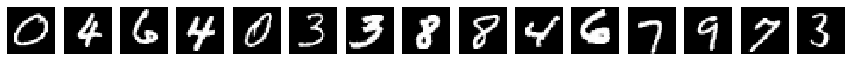

Inputs with Noise:


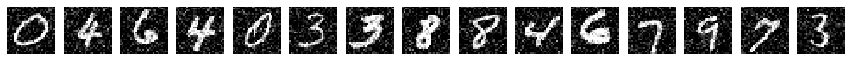

Reconstructions:


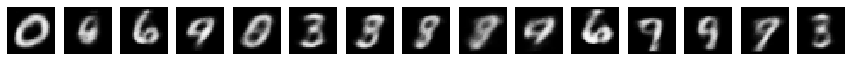

  Epoch 1/50	 Loss: 0.00185648
Inputs:


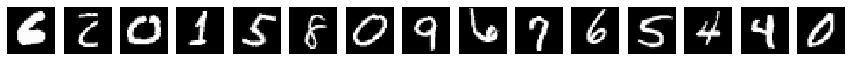

Inputs with Noise:


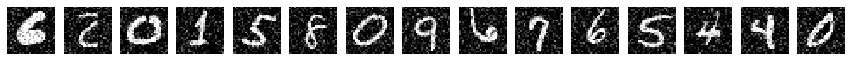

Reconstructions:


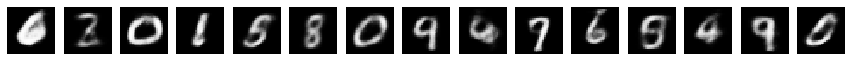

  Epoch 2/50	 Loss: 0.00125816
Inputs:


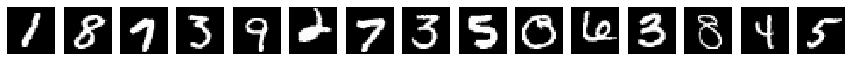

Inputs with Noise:


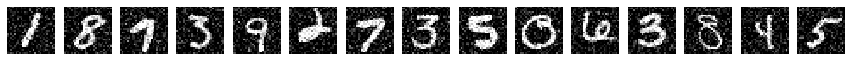

Reconstructions:


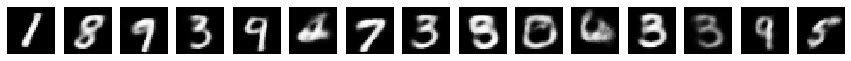

  Epoch 3/50	 Loss: 0.00114474
Inputs:


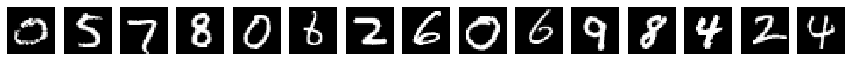

Inputs with Noise:


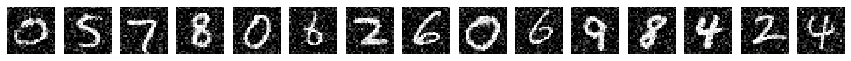

Reconstructions:


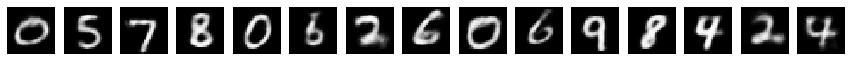

  Epoch 4/50	 Loss: 0.00106151
Inputs:


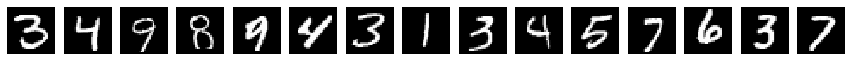

Inputs with Noise:


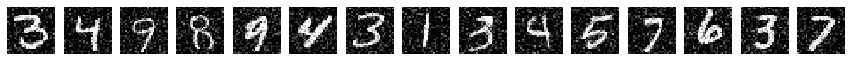

Reconstructions:


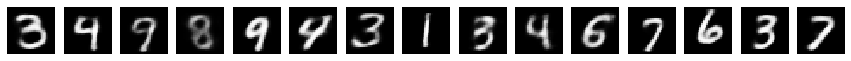

  Epoch 5/50	 Loss: 0.00100115
Inputs:


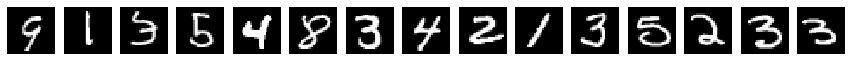

Inputs with Noise:


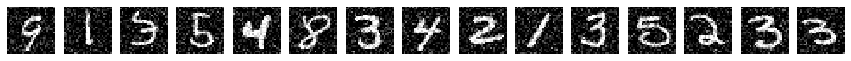

Reconstructions:


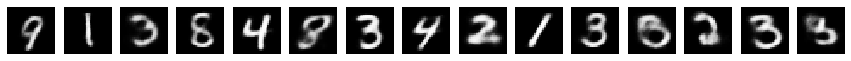

  Epoch 6/50	 Loss: 0.00095752
Inputs:


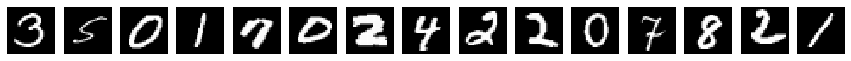

Inputs with Noise:


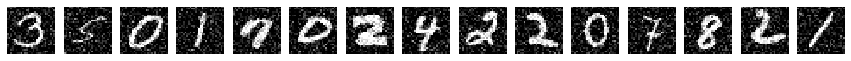

Reconstructions:


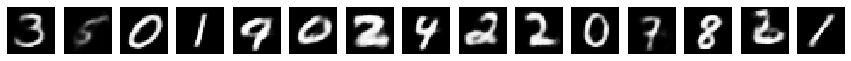

  Epoch 7/50	 Loss: 0.00092531
Inputs:


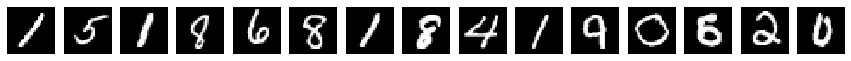

Inputs with Noise:


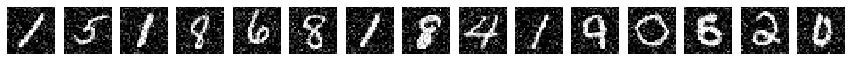

Reconstructions:


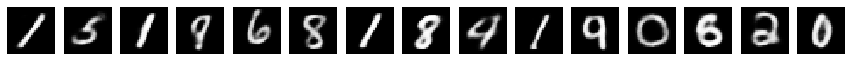

  Epoch 8/50	 Loss: 0.00089949
Inputs:


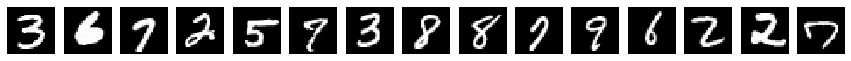

Inputs with Noise:


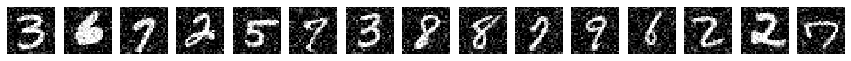

Reconstructions:


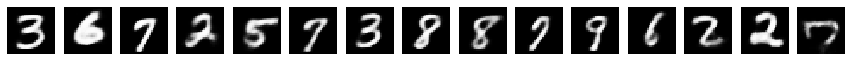

  Epoch 9/50	 Loss: 0.00087069
Inputs:


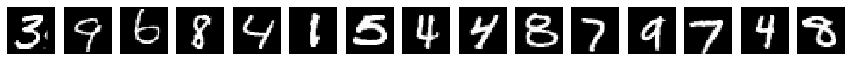

Inputs with Noise:


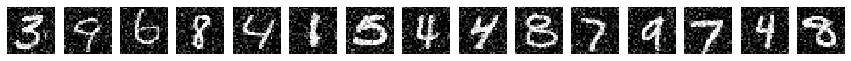

Reconstructions:


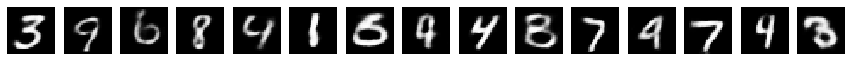

  Epoch 10/50	 Loss: 0.00084804
Inputs:


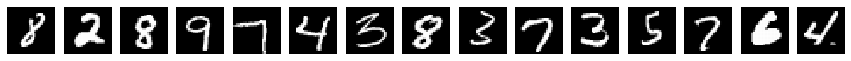

Inputs with Noise:


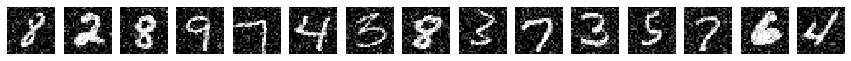

Reconstructions:


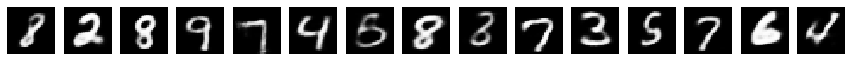

  Epoch 11/50	 Loss: 0.00083268
Inputs:


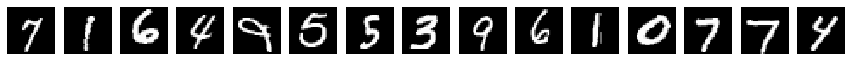

Inputs with Noise:


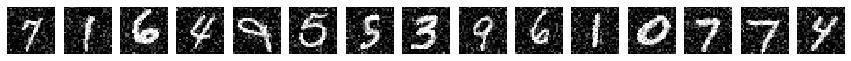

Reconstructions:


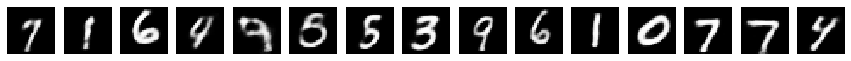

  Epoch 12/50	 Loss: 0.00082031
Inputs:


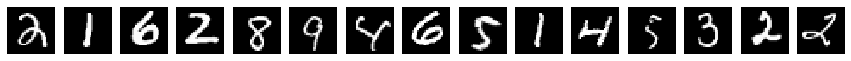

Inputs with Noise:


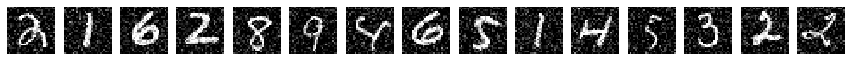

Reconstructions:


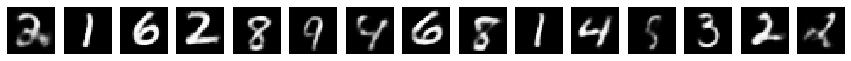

  Epoch 13/50	 Loss: 0.00081014
Inputs:


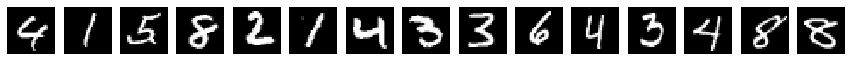

Inputs with Noise:


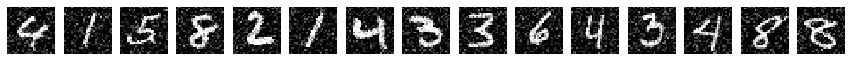

Reconstructions:


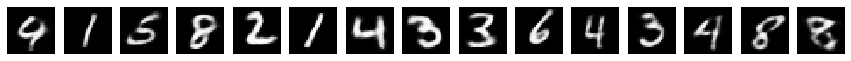

  Epoch 14/50	 Loss: 0.00080183
Inputs:


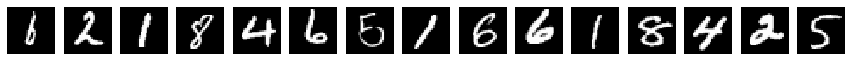

Inputs with Noise:


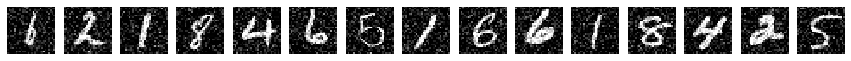

Reconstructions:


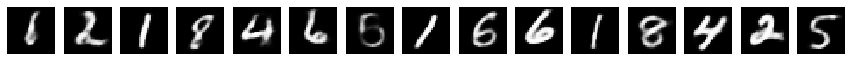

  Epoch 15/50	 Loss: 0.00079388
Inputs:


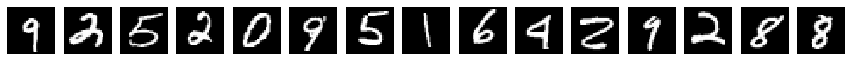

Inputs with Noise:


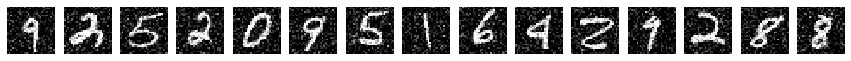

Reconstructions:


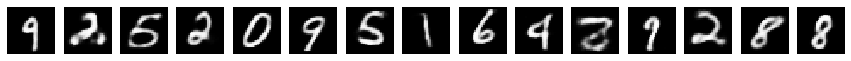

  Epoch 16/50	 Loss: 0.00078639
Inputs:


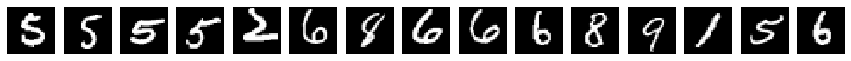

Inputs with Noise:


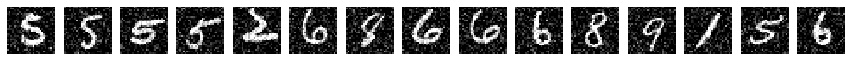

Reconstructions:


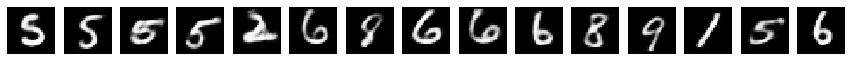

  Epoch 17/50	 Loss: 0.00077956
Inputs:


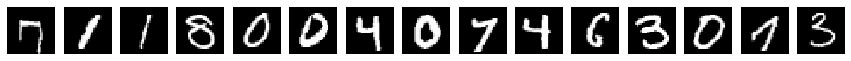

Inputs with Noise:


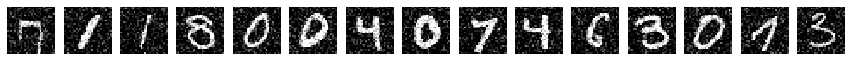

Reconstructions:


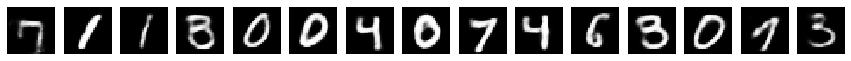

  Epoch 18/50	 Loss: 0.00077350
Inputs:


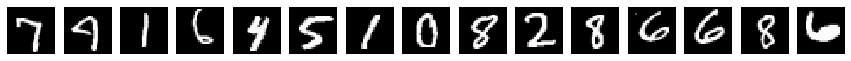

Inputs with Noise:


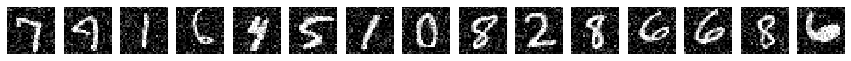

Reconstructions:


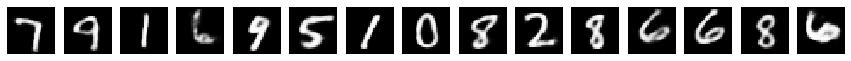

  Epoch 19/50	 Loss: 0.00076798
Inputs:


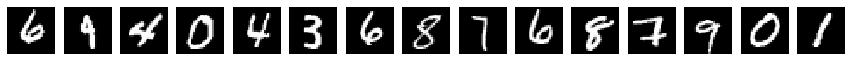

Inputs with Noise:


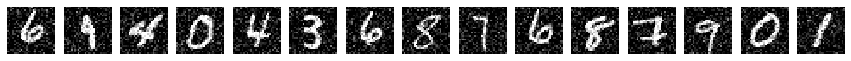

Reconstructions:


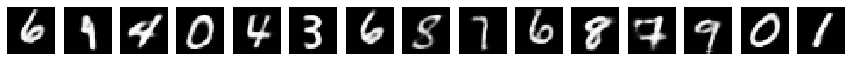

  Epoch 20/50	 Loss: 0.00076328
Inputs:


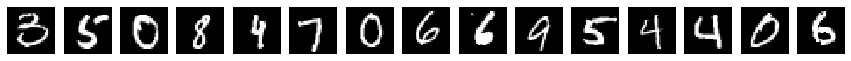

Inputs with Noise:


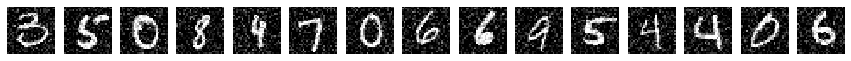

Reconstructions:


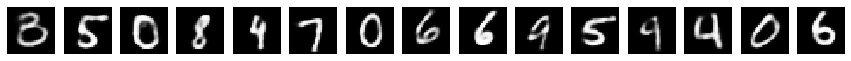

  Epoch 21/50	 Loss: 0.00075748
Inputs:


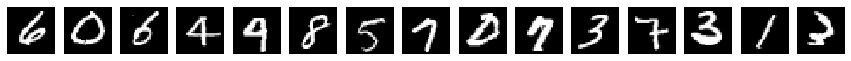

Inputs with Noise:


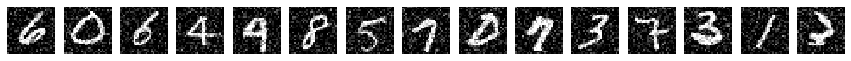

Reconstructions:


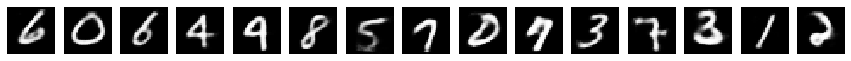

  Epoch 22/50	 Loss: 0.00075353
Inputs:


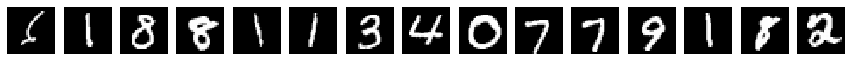

Inputs with Noise:


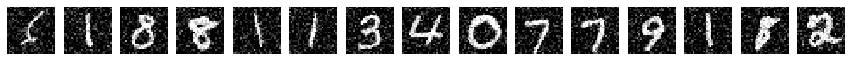

Reconstructions:


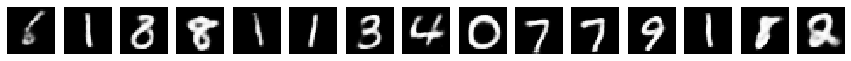

  Epoch 23/50	 Loss: 0.00074993
Inputs:


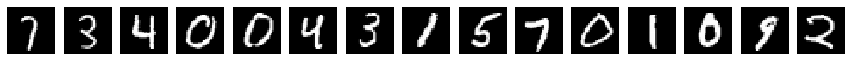

Inputs with Noise:


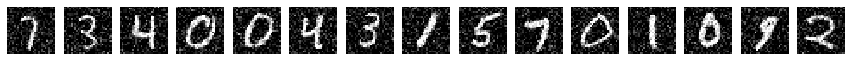

Reconstructions:


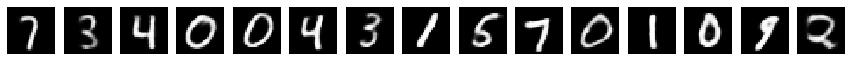

  Epoch 24/50	 Loss: 0.00074665
Inputs:


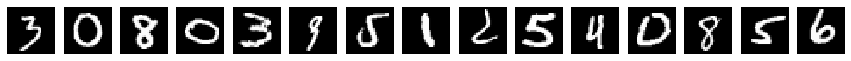

Inputs with Noise:


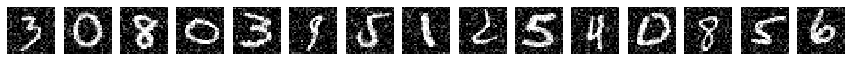

Reconstructions:


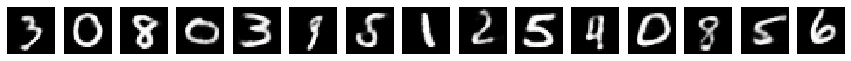

  Epoch 25/50	 Loss: 0.00074253
Inputs:


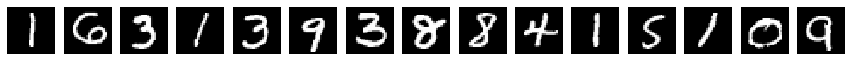

Inputs with Noise:


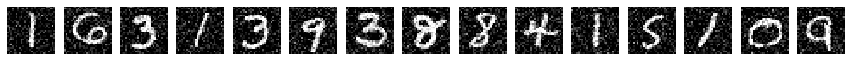

Reconstructions:


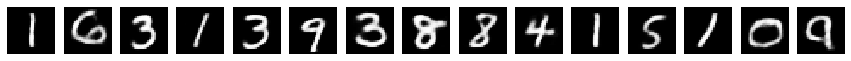

  Epoch 26/50	 Loss: 0.00073930
Inputs:


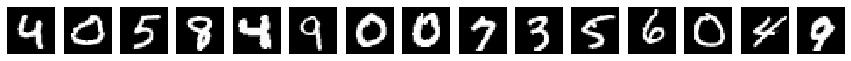

Inputs with Noise:


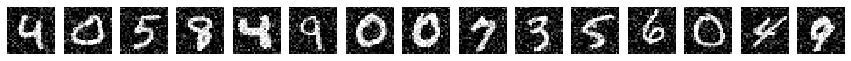

Reconstructions:


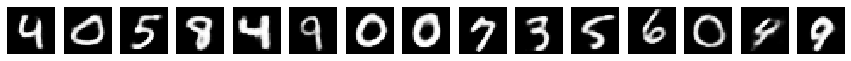

  Epoch 27/50	 Loss: 0.00073569
Inputs:


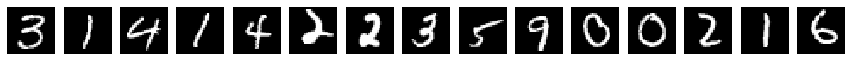

Inputs with Noise:


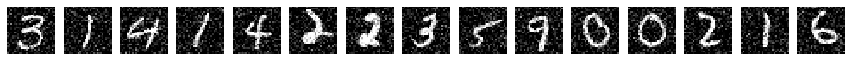

Reconstructions:


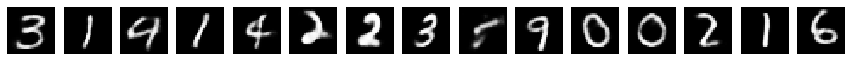

  Epoch 28/50	 Loss: 0.00073340
Inputs:


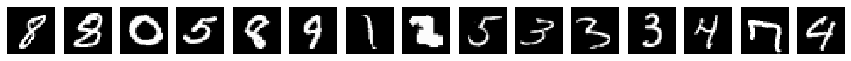

Inputs with Noise:


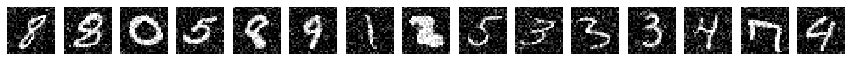

Reconstructions:


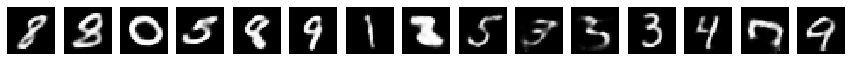

  Epoch 29/50	 Loss: 0.00073101
Inputs:


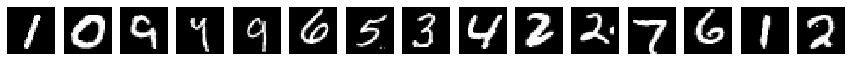

Inputs with Noise:


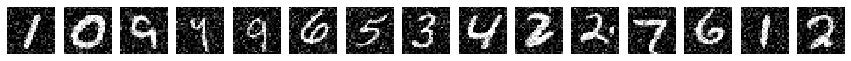

Reconstructions:


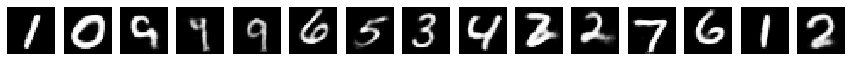

  Epoch 30/50	 Loss: 0.00072894
Inputs:


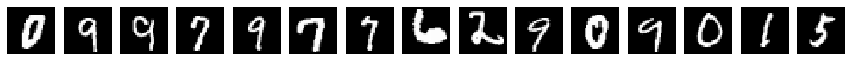

Inputs with Noise:


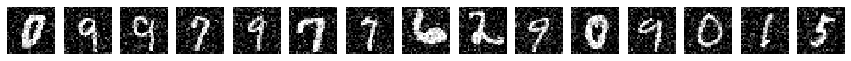

Reconstructions:


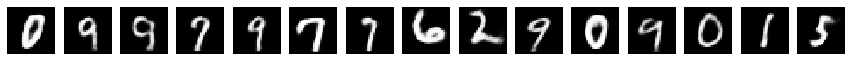

  Epoch 31/50	 Loss: 0.00072691
Inputs:


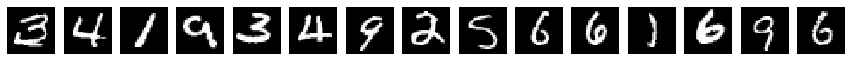

Inputs with Noise:


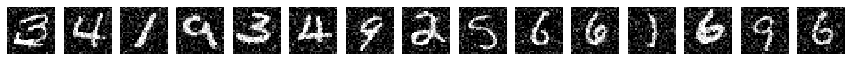

Reconstructions:


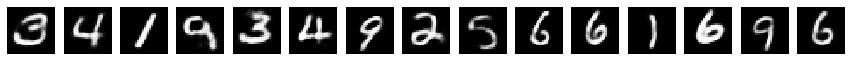

  Epoch 32/50	 Loss: 0.00072431
Inputs:


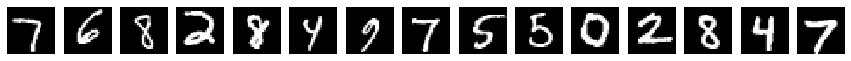

Inputs with Noise:


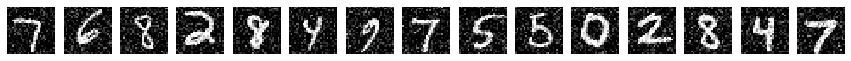

Reconstructions:


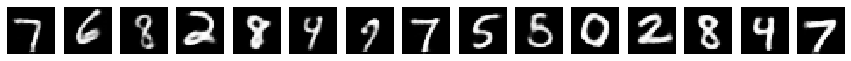

  Epoch 33/50	 Loss: 0.00072196
Inputs:


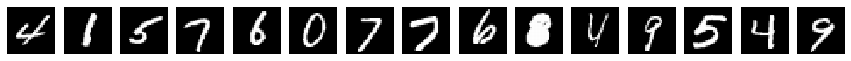

Inputs with Noise:


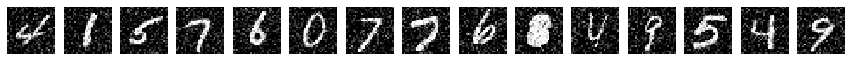

Reconstructions:


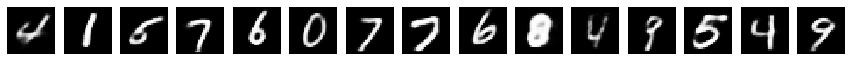

  Epoch 34/50	 Loss: 0.00071905
Inputs:


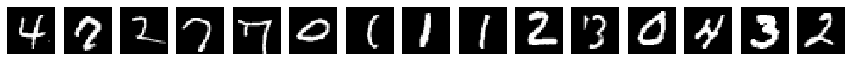

Inputs with Noise:


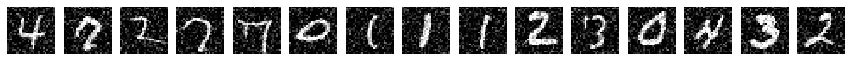

Reconstructions:


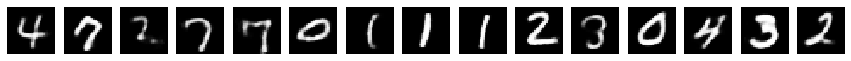

  Epoch 35/50	 Loss: 0.00071699
Inputs:


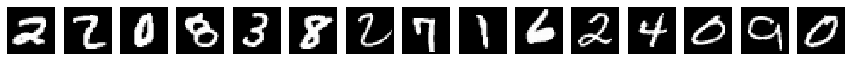

Inputs with Noise:


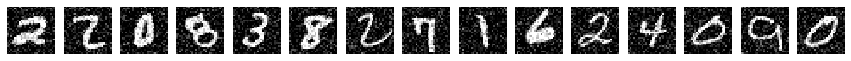

Reconstructions:


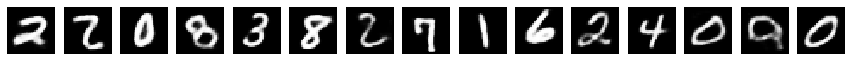

  Epoch 36/50	 Loss: 0.00071509
Inputs:


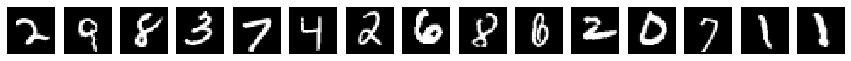

Inputs with Noise:


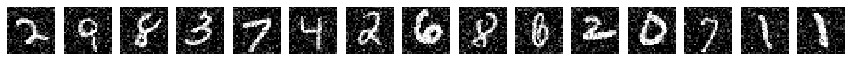

Reconstructions:


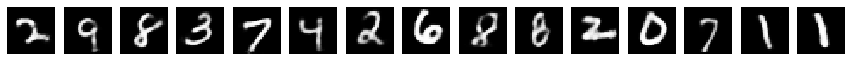

  Epoch 37/50	 Loss: 0.00071255
Inputs:


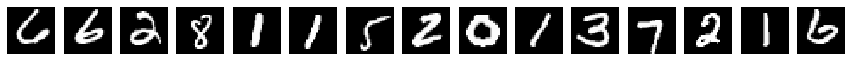

Inputs with Noise:


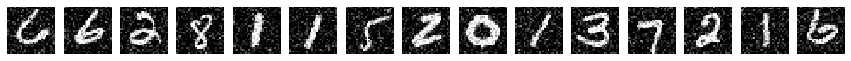

Reconstructions:


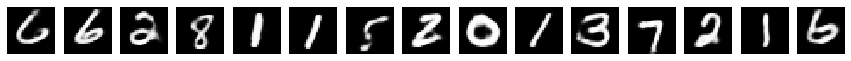

  Epoch 38/50	 Loss: 0.00071083
Inputs:


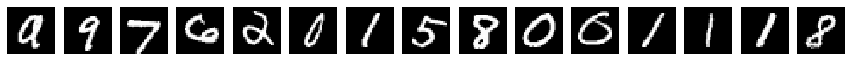

Inputs with Noise:


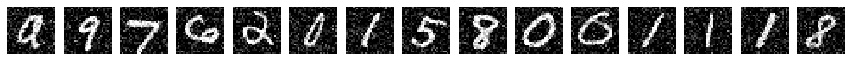

Reconstructions:


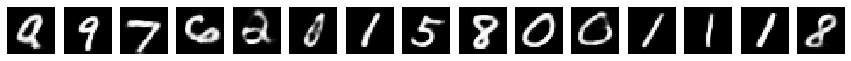

  Epoch 39/50	 Loss: 0.00070846
Inputs:


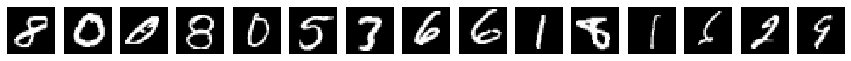

Inputs with Noise:


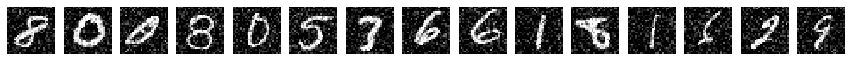

Reconstructions:


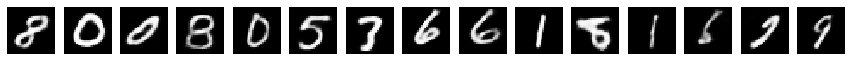

  Epoch 40/50	 Loss: 0.00070682
Inputs:


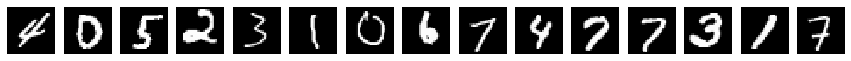

Inputs with Noise:


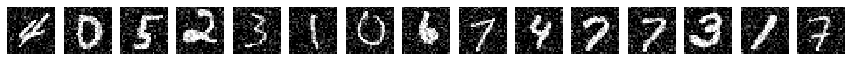

Reconstructions:


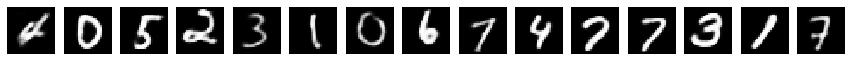

  Epoch 41/50	 Loss: 0.00070536
Inputs:


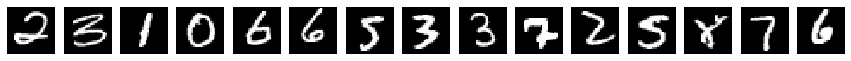

Inputs with Noise:


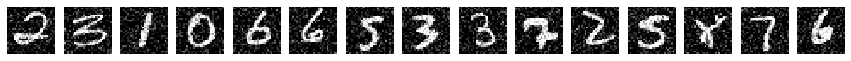

Reconstructions:


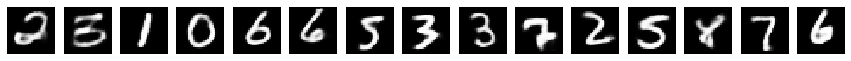

  Epoch 42/50	 Loss: 0.00070366
Inputs:


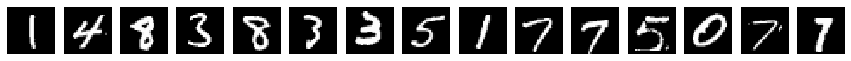

Inputs with Noise:


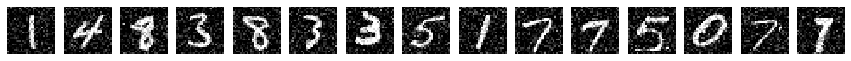

Reconstructions:


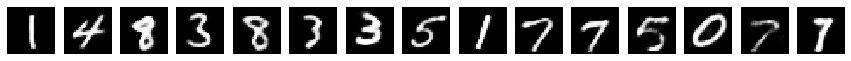

  Epoch 43/50	 Loss: 0.00070244
Inputs:


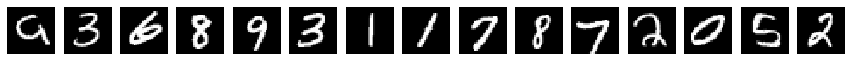

Inputs with Noise:


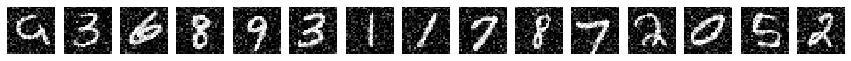

Reconstructions:


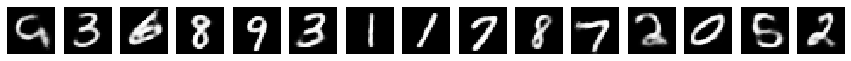

  Epoch 44/50	 Loss: 0.00070077
Inputs:


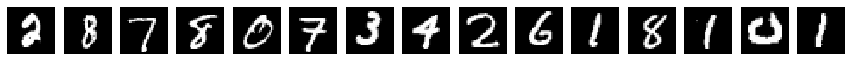

Inputs with Noise:


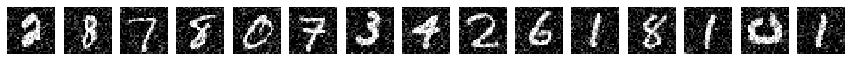

Reconstructions:


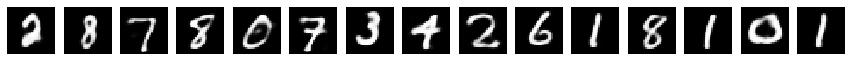

  Epoch 45/50	 Loss: 0.00069936
Inputs:


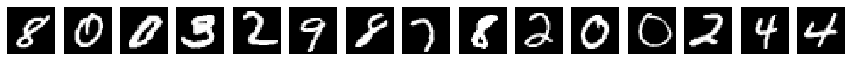

Inputs with Noise:


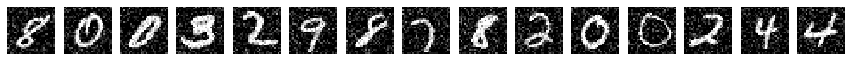

Reconstructions:


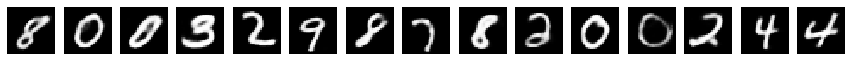

  Epoch 46/50	 Loss: 0.00069864
Inputs:


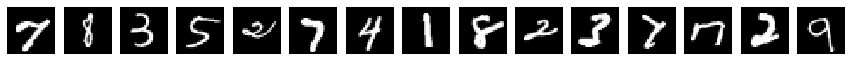

Inputs with Noise:


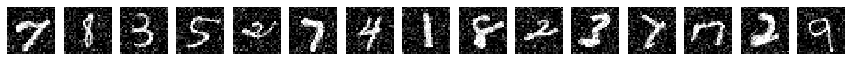

Reconstructions:


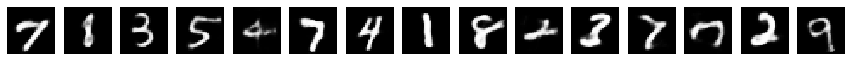

  Epoch 47/50	 Loss: 0.00069770
Inputs:


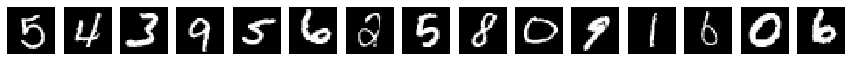

Inputs with Noise:


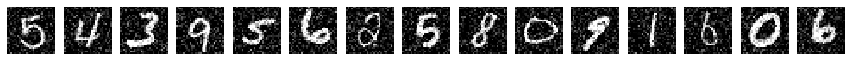

Reconstructions:


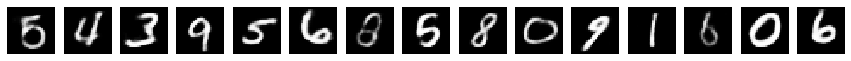

  Epoch 48/50	 Loss: 0.00069738
Inputs:


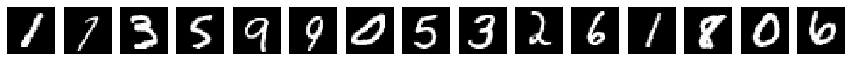

Inputs with Noise:


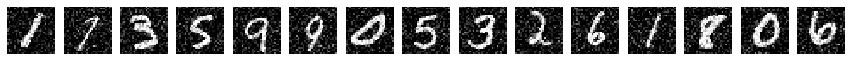

Reconstructions:


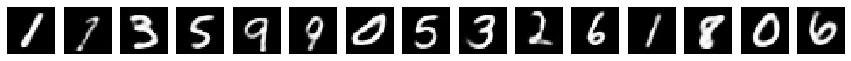

  Epoch 49/50	 Loss: 0.00069575
Inputs:


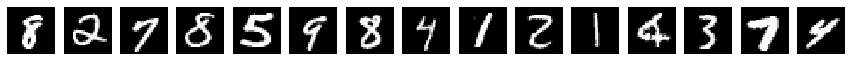

Inputs with Noise:


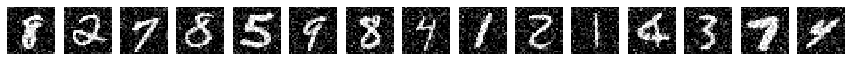

Reconstructions:


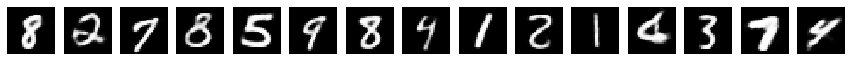

  Epoch 50/50	 Loss: 0.00069550


In [ ]:
# Train
for epoch in range(1, N_EPOCH + 1):
    dae.train()

    train_loss = 0.0
    for (data, cond) in train_loader:
        inputs = data
        inputs = inputs.view(inputs.size(0), -1)

        # add noise to inputs
        inputs_with_noise = add_noise(inputs).to(device)
        
        outputs = dae(inputs_with_noise)
        
        optimizer.zero_grad()
        
        loss=criterion(outputs,inputs.to(device))
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    # Visualization
    visualization(inputs, inputs_with_noise.to('cpu'),  outputs.to('cpu'))
    print ('  Epoch {}/{}\t Loss: {:.8f}'
                .format(epoch, N_EPOCH, train_loss / len(train_loader.dataset)))
    
